Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

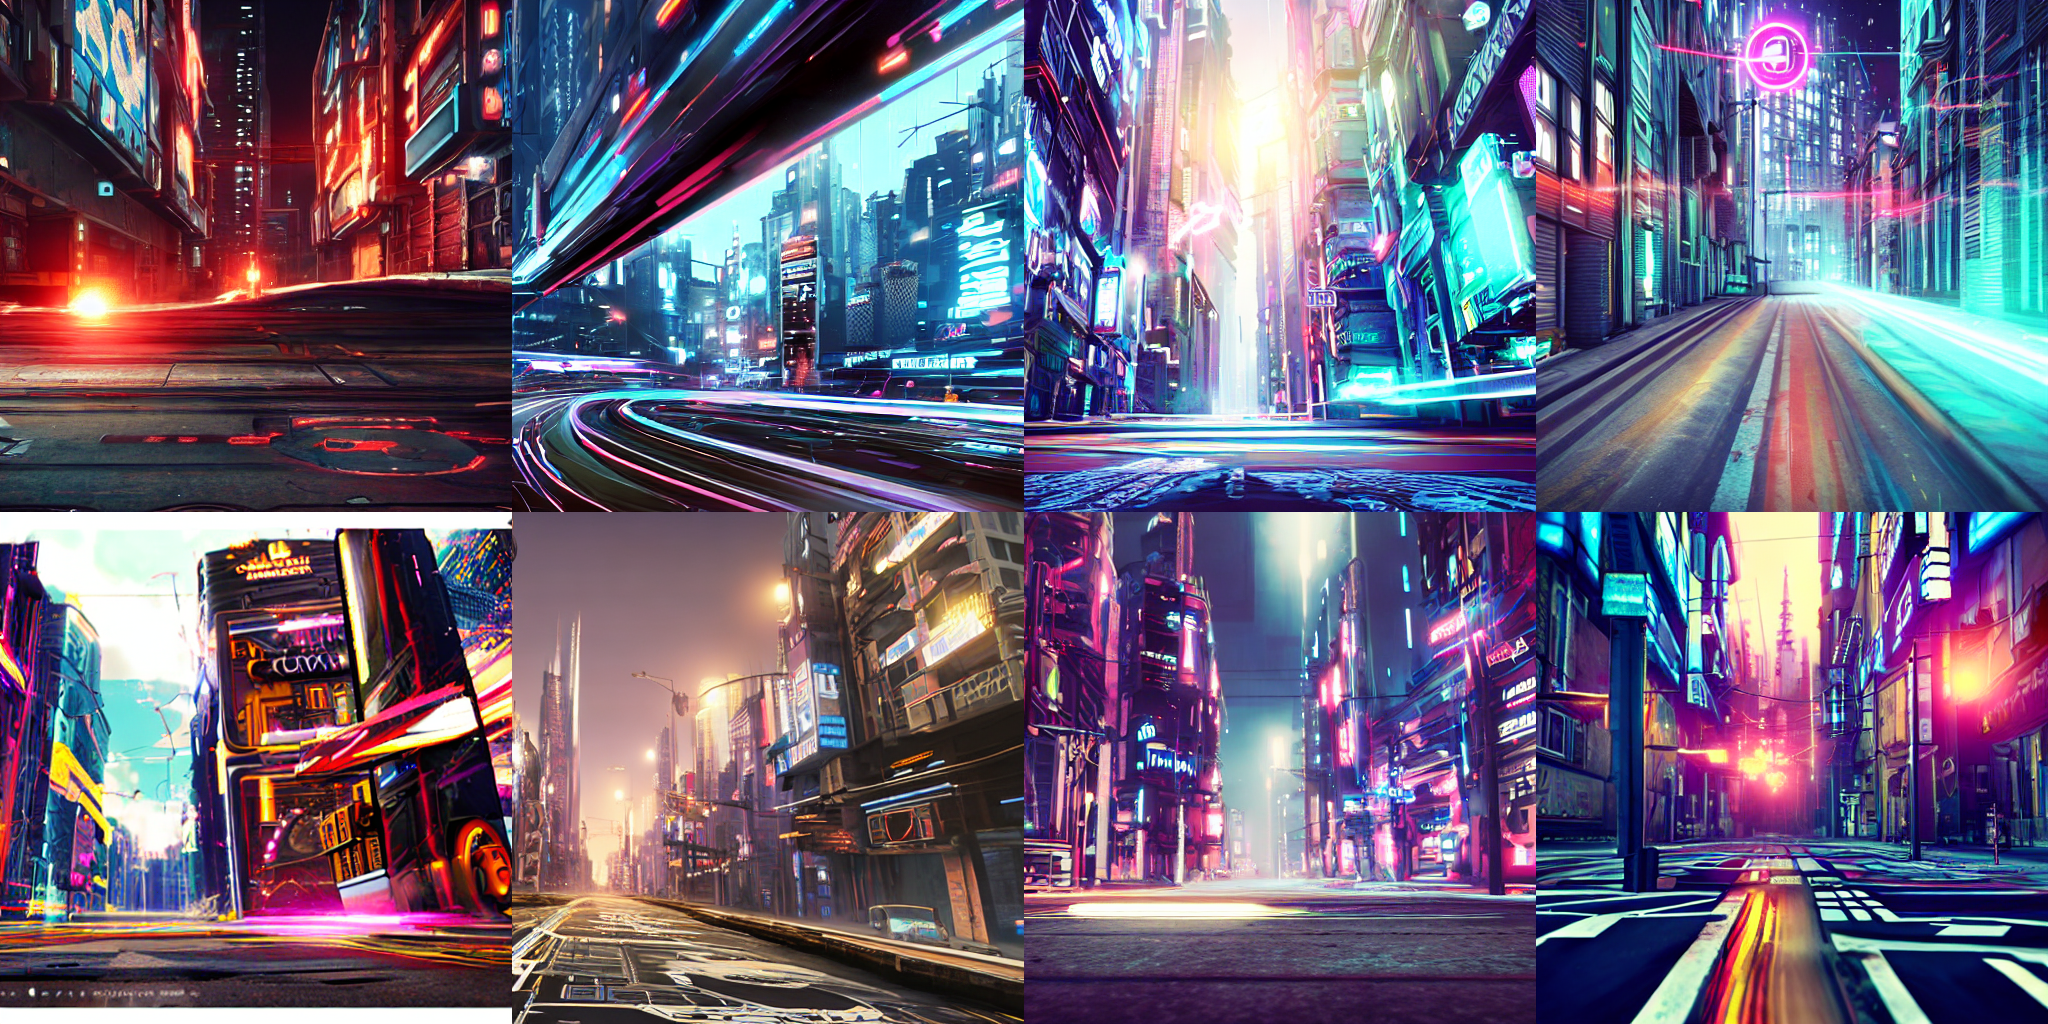

In [5]:
import torch
from diffusers import StableDiffusionPipeline
from transformers import AutoTokenizer
torch.backends.cudnn.benchmark = True
pipe = StableDiffusionPipeline.from_pretrained("IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Chinese-v0.1", torch_dtype=torch.float16)
# pipe = StableDiffusionPipeline.from_pretrained("/root/individual/hello2mao/aigc-test/stable_diffusion_dreambooth/workspace/impulse-sd-dreambooth/hf_out_10", torch_dtype=torch.float16)
# pipe = StableDiffusionPipeline.from_pretrained("IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Anime-Chinese-v0.1", torch_dtype=torch.float16)
# pipe = StableDiffusionPipeline.from_pretrained("SkyWork/SkyPaint", torch_dtype=torch.float16)
# pipe = StableDiffusionPipeline.from_pretrained("/root/individual/hello2mao/models/GTQ")
# pipe = StableDiffusionPipeline.from_pretrained("Envvi/Inkpunk-Diffusion")
# pipe = StableDiffusionPipeline.from_pretrained("/root/individual/hello2mao/models/impulse_logo_img")
pipe.to('cuda')

# tokenizer_id = "lyua1225/clip-huge-zh-75k-steps-bs4096"
# sd2_id = "Midu/chinese-style-stable-diffusion-2-v0.1"
# tokenizer = AutoTokenizer.from_pretrained(tokenizer_id, trust_remote_code=True)
# pipe = StableDiffusionPipeline.from_pretrained(sd2_id, torch_dtype=torch.float16, tokenizer=tokenizer)
# pipe.to("cuda")

# pipe("赛博朋克风格的城市街道，8K分辨率，CG渲染", guidance_scale=10, num_inference_steps=20).images[0]

from PIL import Image


def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

prompt = '赛博朋克风格的城市街道，8K分辨率，CG渲染'
images = pipe(prompt, num_images_per_prompt=8, guidance_scale=7.5).images
image_grid(images, rows=2, cols=4)

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from transformers import AutoTokenizer

tokenizer_id = "lyua1225/clip-huge-zh-75k-steps-bs4096"
sd2_id = "Midu/chinese-style-stable-diffusion-2-v0.1"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_id, trust_remote_code=True)
pipe = StableDiffusionPipeline.from_pretrained(sd2_id, torch_dtype=torch.float16, tokenizer=tokenizer)
pipe.to("cuda")

pipe("赛博朋克风格的城市街道，8K分辨率，CG渲染", guidance_scale=10, num_inference_steps=20).images[0]

Some weights of the model checkpoint at lyua1225/clip-huge-zh-75k-steps-bs4096 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.25.layer_norm1.bias', 'vision_model.encoder.layers.15.self_attn.v_proj.weight', 'vision_model.encoder.layers.1.layer_norm2.weight', 'vision_model.encoder.layers.24.layer_norm1.bias', 'vision_model.encoder.layers.15.mlp.fc2.bias', 'vision_model.encoder.layers.16.self_attn.q_proj.weight', 'vision_model.encoder.layers.11.mlp.fc2.weight', 'vision_model.encoder.layers.7.layer_norm1.bias', 'vision_model.encoder.layers.7.mlp.fc1.weight', 'vision_model.encoder.layers.12.mlp.fc1.bias', 'vision_model.encoder.layers.19.layer_norm2.bias', 'vision_model.encoder.layers.3.self_attn.out_proj.bias', 'vision_model.encoder.layers.16.self_attn.q_proj.bias', 'vision_model.encoder.layers.7.self_attn.v_proj.bias', 'vision_model.encoder.layers.4.self_attn.q_proj.weight', 'vision_model.encoder.layers.17.self_attn.q_proj.weight', 'vision_model.encoder.layers

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/20 [00:00<?, ?it/s]

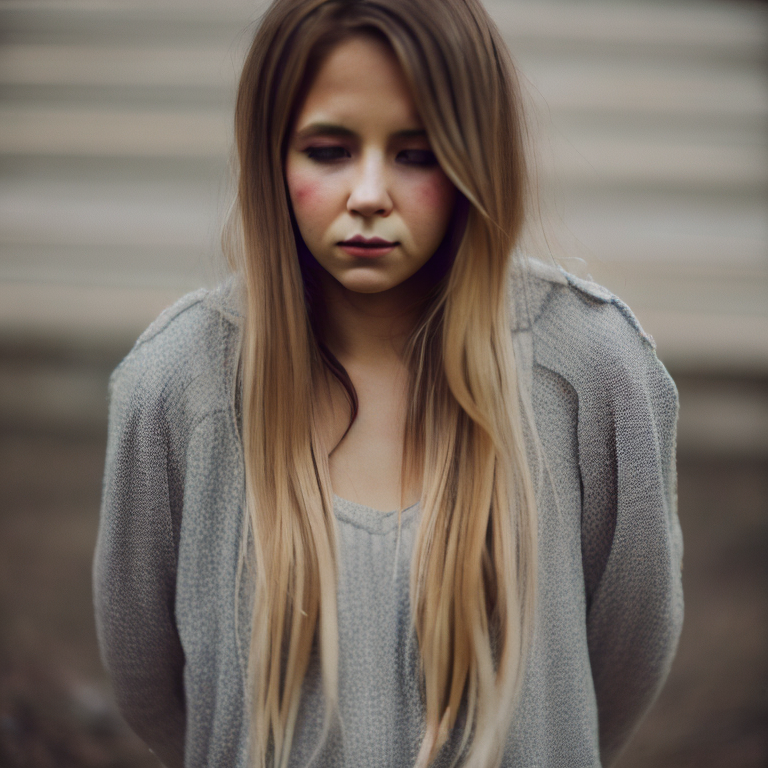

In [8]:
import torch
from diffusers import StableDiffusionPipeline
from transformers import AutoTokenizer, CLIPTextModel

clip_id = "lyua1225/clip-huge-zh-75k-steps-bs4096"
# sd2_id = "stabilityai/stable-diffusion-2-1"
sd2_id = "plasmo/naturitize-sd2-1-768px"

text_encoder = CLIPTextModel.from_pretrained(clip_id)
tokenizer = AutoTokenizer.from_pretrained(clip_id, trust_remote_code=True)

pipe = StableDiffusionPipeline.from_pretrained(sd2_id, tokenizer=tokenizer, text_encoder=text_encoder)
pipe.to("cuda")

pipe("女生头像, photo by dblx", num_inference_steps=20).images[0]